# Loss Functions and Optimizers in ML models

https://www.datacamp.com/tutorial/loss-function-in-machine-learning

    A loss function measures the difference between the predicted output of a model and the actual output, while an optimizer adjusts the model’s parameters to minimize the loss function


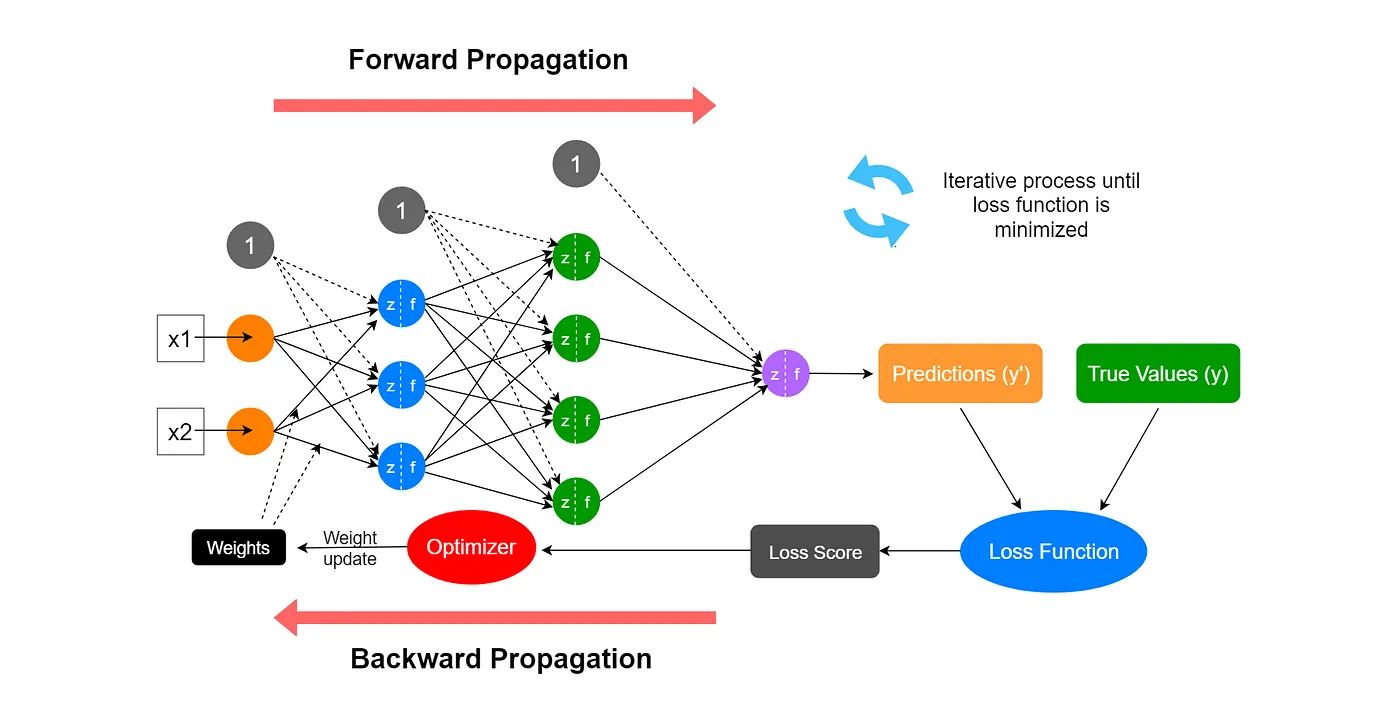

# Loss functions
Broadly speaking, loss functions can be grouped into two major categories: concerning the types of problems we come across in the real world: 
- classification
- regression
  
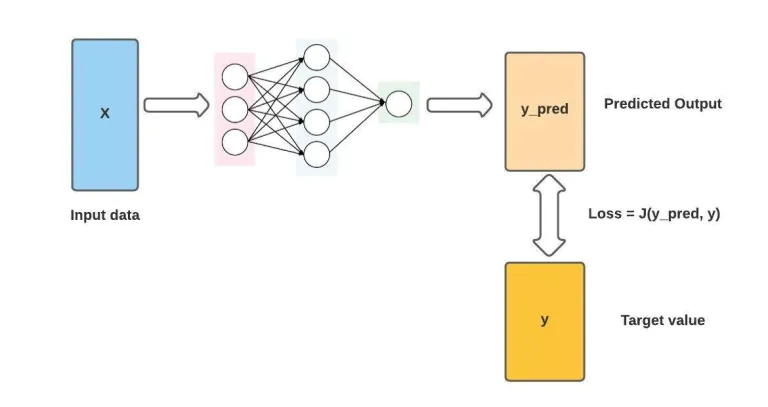


## Regression :

#### 1. Mean Square Error (MSE) / Quadrtic Loss / L2 Loss
    torch.nn.MSELoss(size_average=True, reduce=True, reduction='mean')
    
https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html

   > MSE is a commonly used loss function for regression problems. Measures the average squared difference between true and predicted values. Commonly used in regression tasks.
>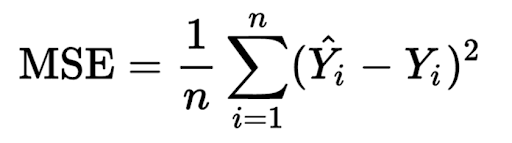

#### 2. Mean Absolute Error (MAE) /  L1 Loss

    torch.nn.L1Loss(size_average=None, reduce=None, reduction='mean')
    
https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html

   > MAE is another commonly used loss function for regression problem. Calculates the average absolute difference between true and predicted values. Another common choice for regression problems.

>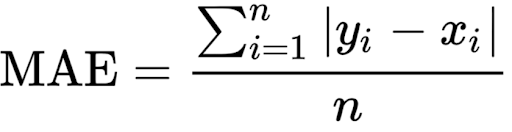



In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets as ds
import matplotlib.pyplot as plt
import random
import torch.nn.functional as F
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import tqdm


In [ ]:
X_numpy, Y_numpy = ds.make_regression(n_samples=100, noise=20,random_state=1,n_features=1)
x=torch.from_numpy(X_numpy.astype(np.float32))
Y=torch.from_numpy(Y_numpy.astype(np.float32))
y = Y.view(Y.shape[0] , 1)

In [ ]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim):
    
        super().__init__() # inherits from nn.Module
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self,x):
        return self.linear(x)


n_sample,n_features = x.shape
print('n_sample:',n_sample)
print('n_features:',n_features)


In [ ]:
input_size  = n_features
output_size = n_features
model = LinearRegression(input_size,output_size)
learning_rate = 0.01
optimizer=torch.optim.SGD(model.parameters() ,lr=learning_rate)

In [ ]:
mse_loss=nn.MSELoss()
mae_loss=nn.L1Loss()

In [ ]:
n_iters = 500
mse_losses = [] 

for epoch in range(n_iters):
#     predictions (forward pass)
    y_predictions=model(x)
#     loss
    l =mse_loss(y,y_predictions)

    
#    calculate gradiant
    l.backward()

    mse_losses.append(l.item() )
    
    if epoch % 50  == 0:
        [w,b] = model.parameters()
        print(f'epoch:{epoch+1},predict:{y_predictions.detach()[0]}, w:{w[0][0].item()} , grad:{w.grad.item()} , loss:{l}' )
#   run optimizer and update weights
    optimizer.step()
#    reset gradients
    optimizer.zero_grad()

In [ ]:
with torch.no_grad():
    predictions=model(x)

plt.plot(range(n_iters),mse_losses,'ro') 
plt.show()

In [ ]:
input_size  = n_features
output_size = n_features
model = LinearRegression(input_size,output_size)
learning_rate = 0.01
optimizer=torch.optim.SGD(model.parameters() ,lr=learning_rate)

In [ ]:
n_iters = 500
mae_losses = []

for epoch in range(n_iters):
#     predictions (forward pass)
    y_predictions=model(x)
#     loss

    l =mae_loss(y,y_predictions)

    
#    calculate gradiant
    l.backward()

    mae_losses.append(l.item() )
    
    if epoch % 50  == 0:
        [w,b] = model.parameters()
        print(f'epoch:{epoch+1},predict:{y_predictions.detach()[0]}, w:{w[0][0].item()} , grad:{w.grad.item()} , loss:{l}' )
#   run optimizer and update weights
    optimizer.step()
#    reset gradients
    optimizer.zero_grad()

In [ ]:
# losses[10]

In [ ]:
with torch.no_grad():
    predictions=model(x)

plt.plot(range(n_iters),mae_losses,'ro') 
plt.show()

In [ ]:
# with torch.no_grad():
#     predictions=model(x)
# plt.plot(range(n_iters),mse_losses,'b') 

# plt.plot(range(n_iters),mae_losses,'ro') 
# plt.show()

## Classification

>Cross-entropy loss is a widely used loss function for classification problems.This loss function is particularly useful when the classes are imbalanced. Depending on the data you can use Binary Cross-entropy or Categorical Cross-entropy as well
  
#### 1- Binary Cross-Entropy
    torch.nn.BCELoss(weight=None, size_average=None, reduce=None, reduction='mean')
https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

>Used for binary classification problems; that is, models having only 2 classes
>
>Sigmoid activation function at output layer is more suitable for binary classification.
>
>The sigmoid activation function is applied before calculating the BCE loss to convert the raw output (logits) to probabilities.
>
#### 2- Categorical Cross-Entropy
    torch.nn.CrossEntropyLoss(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean', label_smoothing=0.0)

https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

>Appropriate for multi-class classification, computing the loss between true categorical labels and predicted probabilities.
>
> softmax activation function is only suitable for multi-class classification
>
>Unlike BCE loss, the Cross-Entropy loss function doesn't require an explicit activation function before its application.
>The nn.CrossEntropyLoss() function handles the softmax operation internally, so you should provide the raw logits directly as the input.


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add an extra dimension for the output

# Define the model
class LogisticRegression(nn.Module):
    def __init__(self, in_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(in_features, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

# Instantiate the model and define the loss function and optimizer
model = LogisticRegression(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
bce_losses = []
# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    bce_losses.append(loss.item())
    optimizer.step()
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Evaluation
with torch.no_grad():
    model.eval()
    y_pred = model(torch.tensor(X_test, dtype=torch.float32)).numpy().flatten()
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = (y_pred_binary == y_test).mean()

print(f'Accuracy: {accuracy}')

In [ ]:
# Plotting the training losses
plt.plot(range(len(bce_losses)), bce_losses, 'ro')
plt.xlabel('Iterations')
plt.ylabel('Binery Cross-Entropy Loss')
plt.title('Training Loss')
plt.show()

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class MLP(nn.Module):
    def __init__(self, input_dim, hid_dim, output_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, hid_dim)
        self.layer2 = nn.Linear(hid_dim, hid_dim)
        self.layer3 = nn.Linear(hid_dim, output_dim)
   
    def forward(self, x):
        batch_size, *_ = x.shape
        x = x.view(batch_size, -1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x

training_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
batch_size = 128

train_iterator = torch.utils.data.DataLoader(training_dataset, shuffle=True, batch_size=batch_size)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_dim = 28 * 28
hid_dim = 256
output_dim = 10

model = MLP(input_dim, hid_dim, output_dim)
model = model.to(device)

optimizer = optim.AdamW(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

num_epochs = 5
ce_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_iterator):
        images, labels = images.to(device), labels.to(device)
        
        # Forward
        pred_labels = model(images)
        l = criterion(pred_labels, labels)
        ce_losses.append(l.item())
        
        # Backward
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {i+1}/{len(train_iterator)}, Loss: {l.item():.4f}')



In [ ]:
# Plotting the training losses
plt.plot(range(len(ce_losses)), ce_losses, 'ro')
plt.xlabel('Iterations')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss')
plt.show()

# Optimizers

torch.optim is a PyTorch package containing various optimization algorithms.

https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/

    Once the loss function is defined, an optimizer is used to adjust the model’s parameters to minimize the loss function

    In deep learning, an optimizer is a crucial element that fine-tunes a neural network’s parameters during training. Its primary role is to minimize the model’s error or loss function, enhancing performance.

    Gradient descent is one of the most widely used optimizers. It adjusts the model’s parameters by taking the derivative of the loss function with respect to the parameters and updating the parameters in the direction of the negative gradient

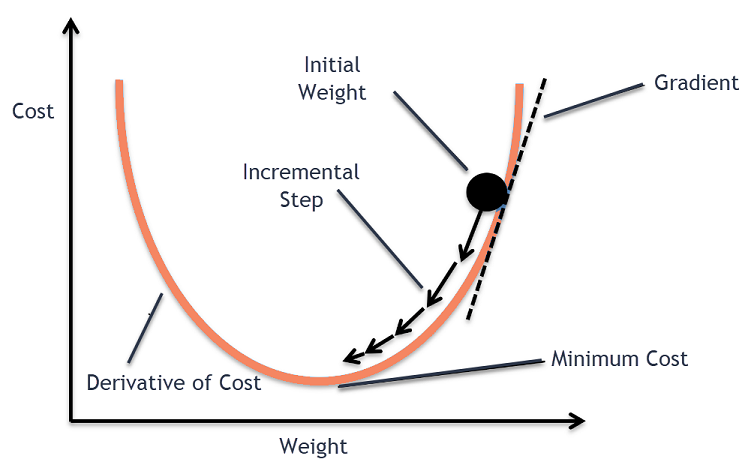  

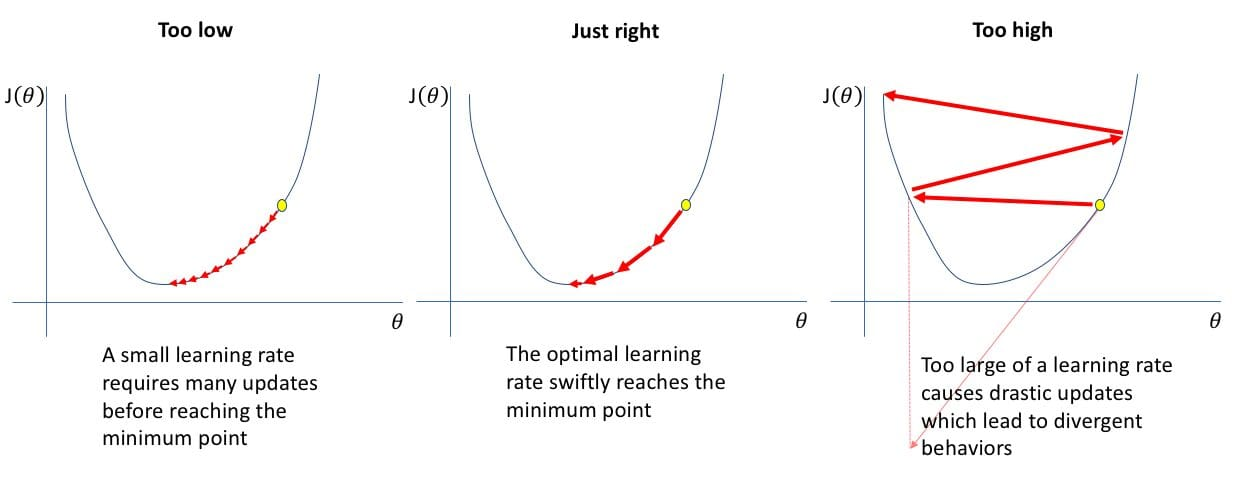

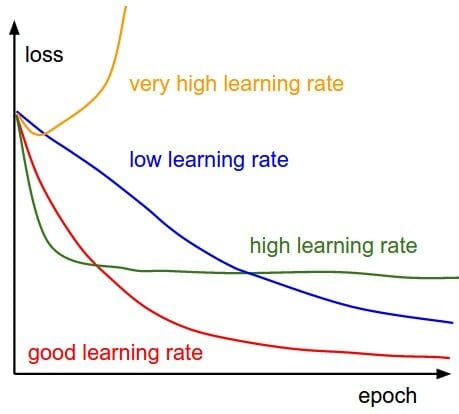



In [ ]:
def train_epoch(iterator, model, optimizer, criterion, device):
    """Performs one epoch of training."""
    
    losses = []

    for images, labels in tqdm.tqdm(iterator):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        predictions = model(images)
        loss = criterion(predictions, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    return losses

def train(train_iterator, model, optimizer, criterion, device, n_epochs=5):
    """Trains the model for the given amount of epochs."""
    
    losses = []

    # model.init_params()

    for epoch in range(n_epochs):
        epoch_losses = train_epoch(train_iterator, model, optimizer, criterion, device)
        losses.extend(epoch_losses)

    return losses

def plot_loss(loss, title=None, ymin=0, ymax=None, figsize=(15,5)):
    """Plots the loss from a single experiment."""
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(loss)
    ax.set_title(title)
    ax.set_ylabel('Loss')
    ax.set_xlabel('Update Steps')
    ax.set_ylim(ymin=ymin, ymax=ymax)
    ax.grid()

def plot_losses(losses, labels, title=None, ymin=0, ymax=None, figsize=(15,5)):
    """Plots the losses from multiple experiments."""
    
    fig, ax = plt.subplots(figsize=figsize)
    for loss, label in zip(losses, labels):
        ax.plot(loss, label=label)
    ax.set_title(title)
    ax.set_ylabel('Loss')
    ax.set_xlabel('Update Steps')
    ax.set_ylim(ymin=ymin, ymax=ymax)
    ax.grid()
    ax.legend(loc='upper right')

In [ ]:
torch.manual_seed(1234)
random.seed(1234)
np.random.seed(1234)

In [ ]:
mean = 0.13066048920154572
std  = 0.30810779333114624

train_transforms = transforms.Compose([
                            transforms.RandomRotation(5),
                            transforms.RandomCrop(28, padding = 2),
                            transforms.ToTensor(),
                            transforms.Normalize(mean = [mean], std = [std])])

train_data = datasets.MNIST(root = '.data', 
                            train = True, 
                            download = True, 
                            transform = train_transforms)

In [ ]:
batch_size = 128

train_iterator = data.DataLoader(train_data, 
                                 shuffle = True, 
                                 batch_size = batch_size)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_dim, hid_dim, output_dim):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, hid_dim)
        self.layer2 = nn.Linear(hid_dim, hid_dim)
        self.layer3 = nn.Linear(hid_dim, output_dim)
   
    def forward(self, x):
        # x = [batch size, channels, height, width]
        batch_size, *_ = x.shape
        x = x.view(batch_size, -1)
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_dim = 28 * 28
hid_dim = 256
output_dim = 10

model = MLP(input_dim, hid_dim, output_dim)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)


### 1- Stochastic Gradient Descent (SGD)

    torch.optim.SGD(params, lr=0.001, momentum=0, dampening=0, weight_decay=0, nesterov=False, *, maximize=False, foreach=None, differentiable=False)

https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD

>SGD is an extension of gradient descent. It updates the model’s parameters after each training sample, rather than after each epoch



In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [ ]:
sgd_loss = train(train_iterator, model, optimizer, criterion, device)

In [ ]:
plot_loss(sgd_loss, 'SGD with lr=1e-3')

#### SGD w Momentum

In [ ]:
optimizer = torch.optim.SGD(model.parameters(),lr=1e-3, momentum=0.9)
sgd_momentum_loss = train(train_iterator, model, optimizer, criterion, device)

In [ ]:
plot_loss(sgd_momentum_loss, 'SGDMomentum with lr=1e-3, momentum=0.9')

In [ ]:
losses = [sgd_loss, sgd_momentum_loss]
labels = ['sgd', 'sgd_momentum']

plot_losses(losses, labels, 'SGD vs SGDMomentum')


### 2- Adagrad
    torch.optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10, foreach=None, *, maximize=False, differentiable=False)
https://pytorch.org/docs/stable/generated/torch.optim.Adagrad.html#torch.optim.Adagrad

>Adagrad (short for adaptive gradient) penalizes the learning rate for parameters that are frequently updated, instead, it gives more learning rate to sparse parameters, parameters that are not updated as frequently.


In [ ]:
optimizer = torch.optim.Adagrad(model.parameters(),lr=1e-2, eps=1e-10)

In [ ]:
adagrad_loss = train(train_iterator, model, optimizer, criterion, device)

In [ ]:
plot_loss(adagrad_loss, 'Adagrad with lr=1e-2, init_acc_sqr_grad=0, eps=1e-10')

In [ ]:
losses = [sgd_loss, sgd_momentum_loss, adagrad_loss]
labels = ['sgd', 'sgd_momentum', 'adagrad_loss']

plot_losses(losses, labels, 'SGD vs. SGDMomentum vs. Adagrad', ymax=5.0)

#### 3- Adadelta
    torch.optim.Adadelta(params, lr=1.0, rho=0.9, eps=1e-06, weight_decay=0, foreach=None, *, maximize=False, differentiable=False)
    
https://pytorch.org/docs/stable/generated/torch.optim.Adadelta.html#torch.optim.Adadelta

>Adadelta is yet another variant of AdaGrad.
>instead of having the same learning rate over each iteration, the learning rate adapts over time
>In Adadelta you don’t require an initial learning rate constant to start with



In [ ]:
optimizer = torch.optim.Adadelta(model.parameters(),lr=1.0, rho=0.9, eps=1e-6)

In [ ]:
adadelta_loss = train(train_iterator, model, optimizer, criterion, device)

In [ ]:
plot_loss(adadelta_loss, 'Adadelta with lr=1.0, rho=0.9, eps=1e-6')

In [ ]:
losses = [sgd_loss, sgd_momentum_loss, adagrad_loss, adadelta_loss]
labels = ['sgd', 'sgd momentum', 'adagrad', 'adadelta']

plot_losses(losses, labels, 'SGD vs. SGD Momentum vs. Adagrad vs. Adadelta', ymax=5.0)

### 4- Adaptive Moment Estimation (Adam)

    torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False, *, foreach=None, maximize=False, capturable=False, differentiable=False, fused=None)

https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#torch.optim.Adam

>Adam is an optimizer that combines the advantages of gradient descent and SGD. It uses the first and second moments of the gradients to adjust the learning rate adaptively. Adam is generally considered to be one of the best optimizers for deep learning.


In [ ]:
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3, betas=(0.9, 0.999), eps=1e-8)

In [ ]:
adam_loss = train(train_iterator, model, optimizer, criterion, device)

In [ ]:
plot_loss(adam_loss, 'Adam with lr=1e-3, betas=(0.9, 0.999), eps=1e-8')

In [ ]:
losses = [sgd_loss, sgd_momentum_loss, adagrad_loss, adadelta_loss, adam_loss]
labels = [ 'sgd_loss', 'sgd_momentum_loss','adagrad_loss','adadelta_loss', 'adam']

plot_losses(losses, labels, 'SGD vs. SGD Momentom vs. Adagrad vs. Adadelta vs. Adam', ymax=3.0)

In [ ]:
losses = [  adagrad_loss, adadelta_loss, adam_loss]
labels = [ 'adagrad_loss','adadelta_loss', 'adam']

plot_losses(losses, labels, 'Adagrad vs. Adadelta vs. Adam', ymax=0.5)

### 5- AdamW

    torch.optim.AdamW(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False, *, maximize=False, foreach=None, capturable=False, differentiable=False, fused=None)

https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html#torch.optim.AdamW
  
>AdamW is a modification of Adam that incorporates weight decay directly into the optimization process. It helps prevent overfitting by penalizing large weights.

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(),lr=1e-3, betas=(0.9, 0.999), eps=1e-8)
adamw_loss = train(train_iterator, model, optimizer, criterion, device)


In [ ]:
plot_loss(adamw_loss, 'AdamW with lr=1e-3, betas=(0.9, 0.999), eps=1e-8')

In [ ]:
losses = [sgd_loss, sgd_momentum_loss, adagrad_loss, adadelta_loss, adam_loss,adamw_loss]
labels = [ 'sgd_loss', 'sgd_momentum_loss','adagrad_loss','adadelta_loss', 'adam','AdamW']

plot_losses(losses, labels, 'SGD vs. SGD Momentom vs. Adagrad vs. Adadelta vs. Adam vs. AdamW', ymax=3.0)

In [ ]:
losses = [  adagrad_loss, adadelta_loss, adam_loss,adamw_loss]
labels = [ 'adagrad_loss','adadelta_loss', 'adam','adamW']

plot_losses(losses, labels, 'Adagrad vs. Adadelta vs. Adam vs. AdamW', ymax=0.5)